In [1]:
import numpy as np
import json
from utils import make_analysis,hist_plot

In [2]:
path='results/'
with open(path+'true_train.json','r') as f:
   y_train=np.array(json.load(f))
with open(path+'predicted_train.json','r') as f:
   yhat_train=np.array(json.load(f))
with open(path+'true_valid.json','r') as f:
    y_valid=np.array(json.load(f))
with open(path+'predicted_valid.json','r') as f:
    yhat_valid=np.array(json.load(f))
with open(path+'training_history.json','r') as f:
    hist=json.load(f)

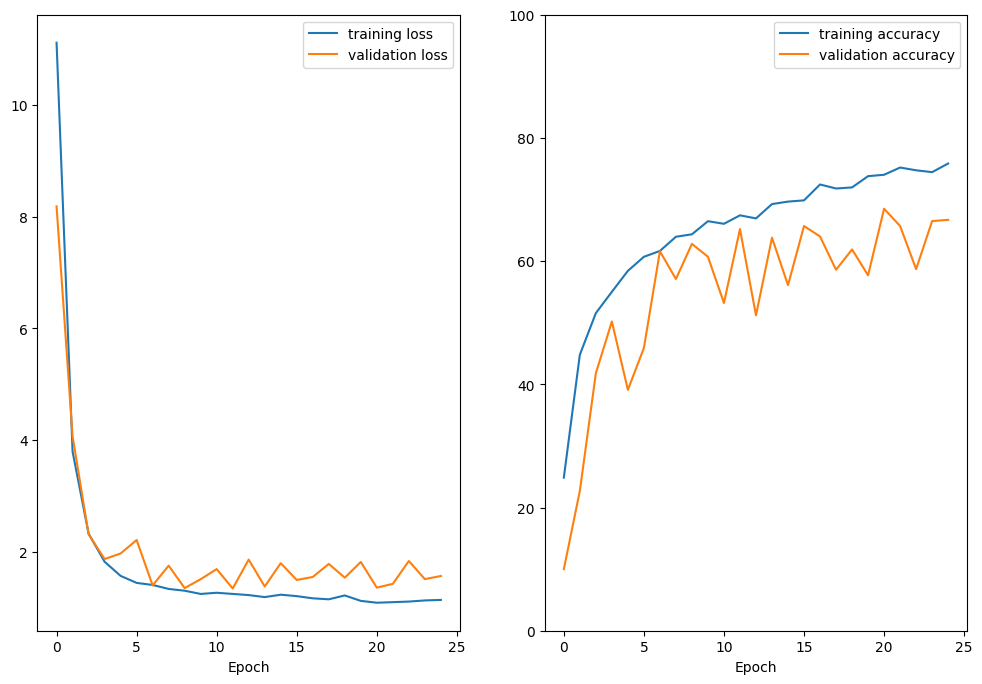

In [3]:
loss=hist['loss']
acc=hist['accuracy']
loss_valid=hist['val_loss']
acc_valid=hist['val_accuracy']
acc=[x*100 for x in acc]
acc_valid=[x*100 for x in acc_valid]
hist_plot(loss,acc,loss_valid,acc_valid)


# VALIDATION

           Accuracy  Precision  Recall  F1 Score  Support
Blues         0.620   0.756098   0.620  0.681319    100.0
Classical     0.930   0.762295   0.930  0.837838    100.0
Country       0.680   0.596491   0.680  0.635514    100.0
Disco         0.420   0.626866   0.420  0.502994    100.0
HipHop        0.710   0.825581   0.710  0.763441    100.0
Jazz          0.910   0.777778   0.910  0.838710    100.0
Metal         0.700   0.404624   0.700  0.512821    100.0
Pop           0.490   0.816667   0.490  0.612500    100.0
Reggae        0.620   0.568807   0.620  0.593301    100.0
Rock          0.590   0.842857   0.590  0.694118    100.0
Average       0.667   0.697806   0.667  0.667255    100.0


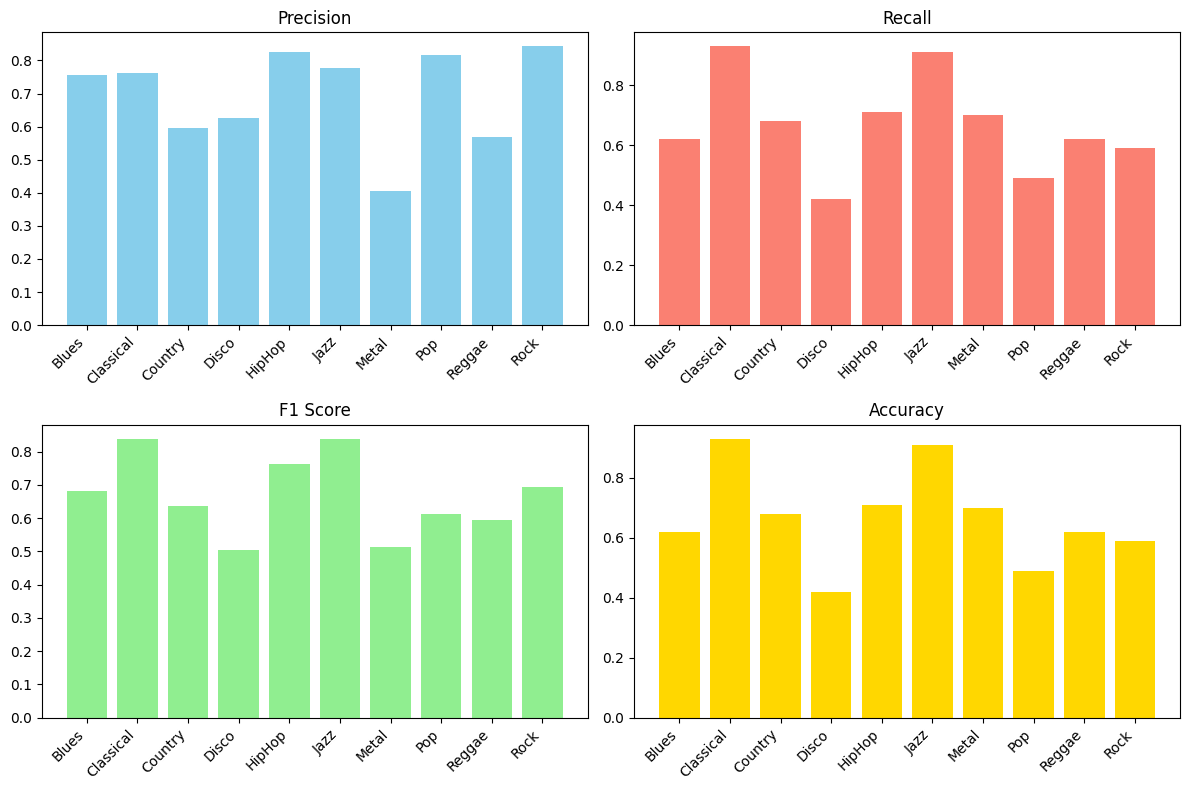

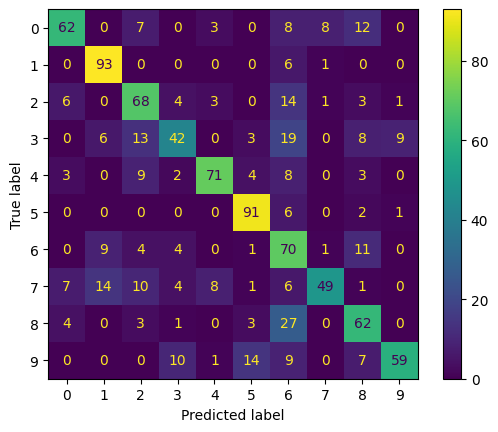

In [4]:
make_analysis(y_valid,yhat_valid)

# TRAIN

           Accuracy  Precision    Recall  F1 Score  Support
Blues      0.830000   0.869110  0.830000  0.849105    400.0
Classical  0.942500   0.937811  0.942500  0.940150    400.0
Country    0.740000   0.868035  0.740000  0.798920    400.0
Disco      0.795000   0.898305  0.795000  0.843501    400.0
HipHop     0.785000   0.837333  0.785000  0.810323    400.0
Jazz       0.930000   0.900726  0.930000  0.915129    400.0
Metal      0.822500   0.584369  0.822500  0.683281    400.0
Pop        0.750000   0.911854  0.750000  0.823045    400.0
Reggae     0.807500   0.624758  0.807500  0.704471    400.0
Rock       0.779747   0.965517  0.779747  0.862745    395.0
Average    0.818225   0.839782  0.818225  0.823067    399.5


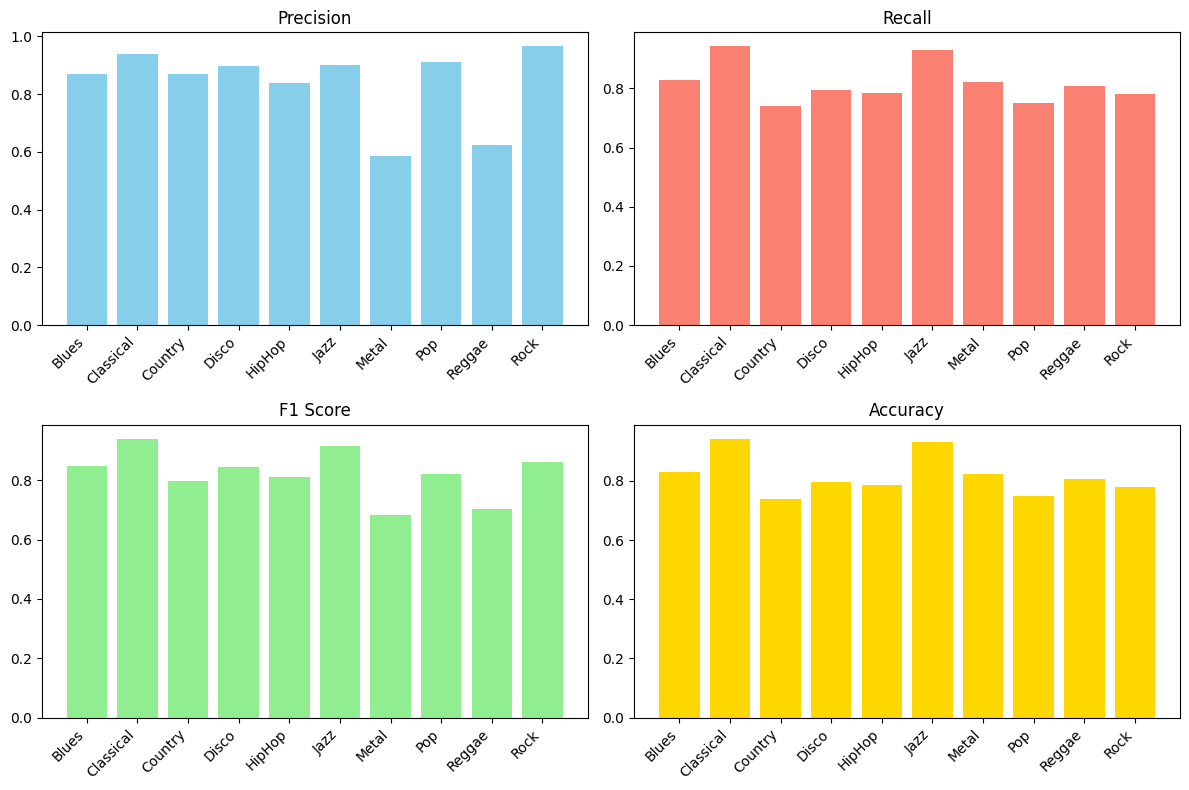

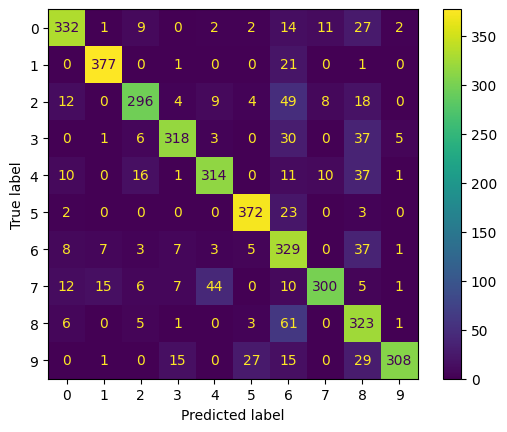

In [5]:
make_analysis(y_train,yhat_train)

## ALL

           Accuracy  Precision    Recall  F1 Score  Support
Blues      0.788000   0.849138  0.788000  0.817427    500.0
Classical  0.940000   0.896947  0.940000  0.917969    500.0
Country    0.728000   0.800000  0.728000  0.762304    500.0
Disco      0.720000   0.855107  0.720000  0.781759    500.0
HipHop     0.770000   0.835141  0.770000  0.801249    500.0
Jazz       0.926000   0.873585  0.926000  0.899029    500.0
Metal      0.798000   0.542120  0.798000  0.645631    500.0
Pop        0.698000   0.897172  0.698000  0.785152    500.0
Reggae     0.770000   0.615016  0.770000  0.683837    500.0
Rock       0.741414   0.943445  0.741414  0.830317    495.0
Average    0.787941   0.810767  0.787941  0.792467    499.5


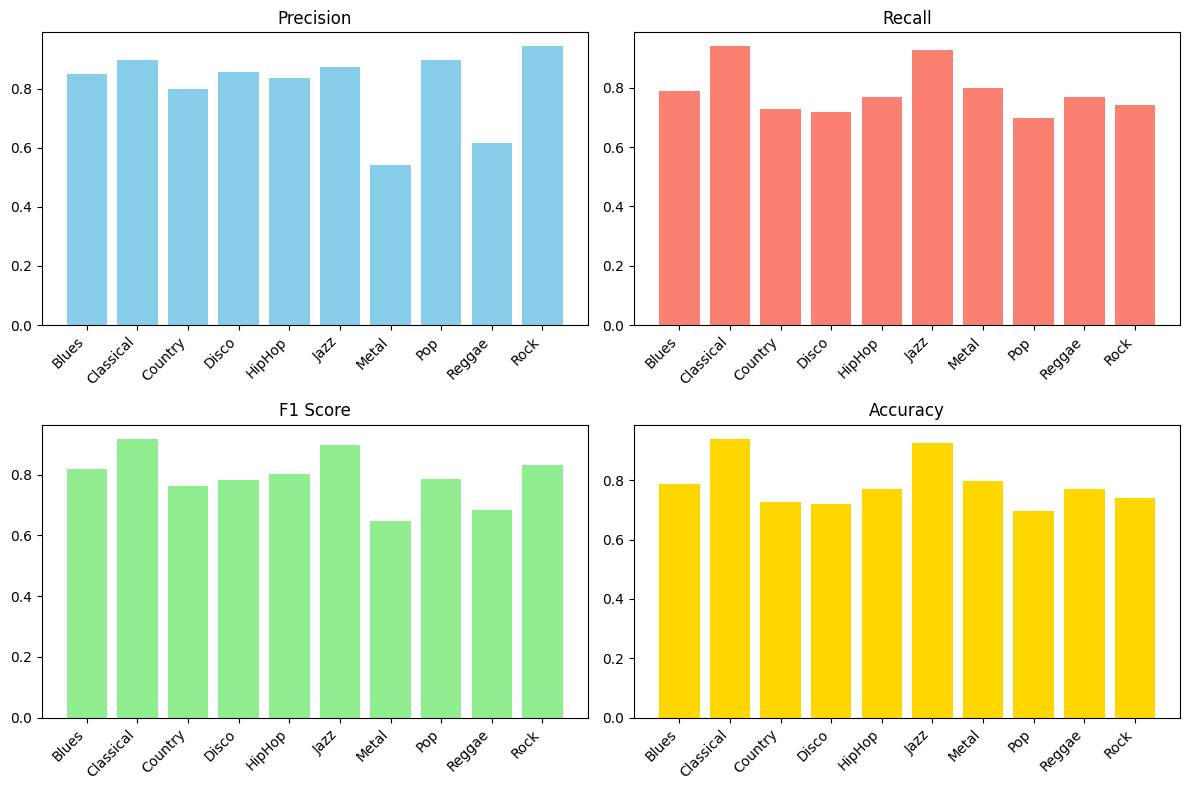

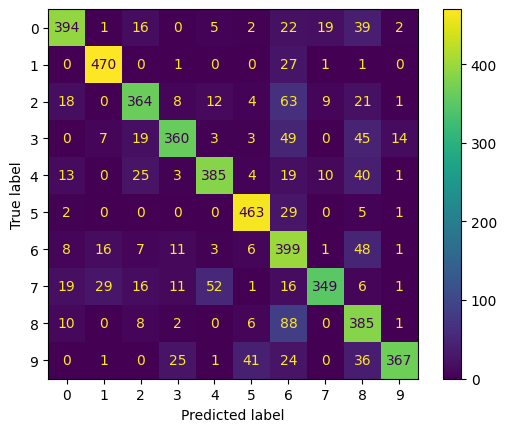

In [14]:
yhat=np.concatenate((yhat_train,yhat_valid))
y=np.concatenate((y_train,y_valid))
make_analysis(y,yhat)